In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

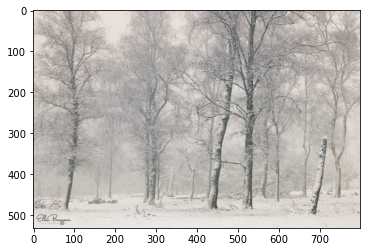

In [6]:
img = cv2.imread("data/low_contrast.jpg")
plt.imshow(img, cmap = 'gray')

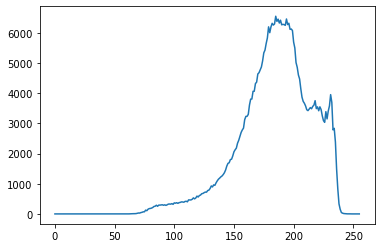

In [5]:
#Ham tinh phan bo muc xam
hist = cv2.calcHist([img], channels = [0], mask = None,
                   histSize=[256],
                   ranges=[0,256])
plt.plot(hist)

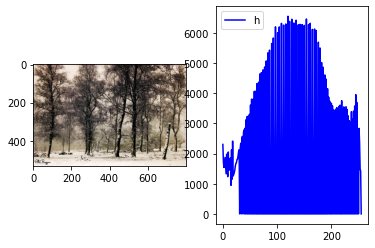

In [9]:
def hist_equalize(img):
    #calculate hist
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    
    #normalize hist
    h, w = img.shape[:2]
    hist = hist/(h*w)
    
    #cal CDF
    cdf = np.cumsum(hist)
    s_k = (255 * cdf - 0.5).astype("uint8")
    return s_k

#Ve anh goc va luoc do xam
def plot_img_and_hist(img):
    hist = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.plot(hist, 'b')
    plt.legend(('histogram'), loc = 'upper left')

#Can bang xam cho anh goc
s_k = hist_equalize(img)
#Ham chuyen doi anh goc sang anh moi voi muc xam can bang
equalized_img = cv2.LUT(img, s_k)
#Ve anh sau can bang va do thi xam
plot_img_and_hist(equalized_img)